# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [3]:
def P1(num_examples=5):
### STUDENT START ###
    for i in range(0,5):
        print ('\tTHE TRAINING EXAMPLE:')
        print(train_data[i])
        print ('LABEL:',format(newsgroups_train.target_names[train_labels[i]]))
### STUDENT END ###
P1()

	THE TRAINING EXAMPLE:
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
LABEL: comp.graphics
	THE TRAINING EXAMPLE:


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centu

### Part 2:

Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [4]:
def P2():
### STUDENT START ###
#a.
    #size of the vocabulary?
    vectorizer = CountVectorizer()
    vtrain = vectorizer.fit_transform(raw_documents = train_data)
    print ('\na)')
    print ('Size of vocabualry is',vtrain.shape[1])

    #average number of non-zero features per example?
    print ('average number of non-zero features per example: ',vtrain.nnz/len(train_data))

    #what fraction of the entries in the matrix are non-zero?
    print ('percentage of entries in matrix are non-zero:', 100*vtrain.nnz/(len(train_data)*vtrain.shape[1]))
    print('sparse matrix is very dense')

    #b.
    #first and last feature string of vectorizer
    vtrain
    feature_strings = vectorizer.get_feature_names()
    feature_strings.sort()
    print ('\nb)')
    print ('first:',feature_strings[0], ',', 'last:',feature_strings[-1])
    
    #c specify own vocab with 4 words
    #confirm the training vecotrs shaped appropriately
    #average number of non-zero features per example
    vocab = ["atheism", "graphics", "space", "religion"]
    v_vocab = CountVectorizer(vocabulary=vocab)
    feature_vectors_vocab = v_vocab.transform(raw_documents = train_data)
    print ('\nc)')
    print ('average number of non-zero features per example with 4 vocab: ',feature_vectors_vocab.nnz/len(train_data))
    
    #d.extracting bigram and trigram 
    v_ngram = CountVectorizer(analyzer= 'char', ngram_range =(2,3))
    feature_v_ngram = v_ngram.fit_transform(raw_documents = train_data)
    print('\nd)')
    print('size of the vocabulary extracting bigram and trigram:',feature_v_ngram.shape[1])

    v_ngram_wb = CountVectorizer(analyzer= 'char_wb', ngram_range =(2,3))
    feature_v_ngram_wb = v_ngram_wb.fit_transform(raw_documents = train_data)
    print('size of the vocabulary extracting bigram and trigram only from text:',feature_v_ngram_wb.shape[1])
    
    #e
    #use min_df to prune words that appear in fewer than 10 documents 
    v_prune = CountVectorizer(min_df = 10)
    feature_v_prune = v_prune.fit_transform(raw_documents = train_data)
    print('\ne)')
    print('prune words that appear in fewer than 10 documents:',feature_v_prune.shape[1])
    
    #f
    #what fraction of words in the dev data are missing from the vocab
    devtrain_size = len(vectorizer.fit(raw_documents = dev_data+train_data).get_feature_names())
    dev_size = len(vectorizer.fit(raw_documents = dev_data).get_feature_names())
    train_size = len(vectorizer.fit(raw_documents = train_data).get_feature_names())
    train_size

    print ('\nf)')
    print('fraction of words in the dev data are missing in %:',100*(devtrain_size - train_size)/dev_size)


### STUDENT END ###
P2()


a)
Size of vocabualry is 26879
average number of non-zero features per example:  96.70599803343165
percentage of entries in matrix are non-zero: 0.3597827226959026
sparse matrix is very dense

b)
first: 00 , last: zyxel

c)
average number of non-zero features per example with 4 vocab:  0.26843657817109146

d)
size of the vocabulary extracting bigram and trigram: 35478
size of the vocabulary extracting bigram and trigram only from text: 28954

e)
prune words that appear in fewer than 10 documents: 3064

f)
fraction of words in the dev data are missing in %: 24.787640034470023


### Part 3:

Use the default CountVectorizer options and report the f1 score (use metrics.f1_score with average="weighted") for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

* Why doesn't nearest neighbors work well for this problem?
* Any ideas why logistic regression doesn't work as well as Naive Bayes?
* Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


optimal k for kNN: 96
f1 score for knn using optimal k: 0.44834460532500914


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
//anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
//anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


optimal_alpha: 0.004
f1 score for Multinomial NB using optimal alpha: 0.7723910891367368


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Optimal_C: 0.18000000000000002
f1 score for a Logistic Regression using optimal value for C: 0.7075749110117433
|      |       alt.atheism|     comp.graphics|         sci.space|talk.religion.misc|
|  0.05|            14.073|            13.669|            14.604|            11.861|
|  0.10|            27.129|            24.659|            27.458|            23.026|
|  0.20|            49.744|            42.743|            49.329|            42.667|
|  0.30|            69.294|            57.895|            67.899|            59.771|
|  0.40|            86.734|            71.146|            84.280|            75.039|
|  0.50|           102.594|            83.120|            99.038|            89.007|
|  1.00|           166.848|           130.865|           157.972|           145.736|
|  1.50|           216.572|           167.512|           202.936|           189.762|
|  2.00|           257.538|           197.878|           239.971|           226.558|
|  7.00|           497.908|           

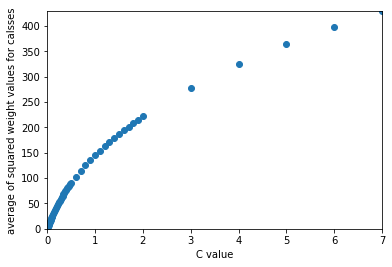

In [7]:
def P3():
### STUDENT START ###
    #vectorizer 
    vectorizer = CountVectorizer()
    vtrain = vectorizer.fit_transform(raw_documents = train_data)
    v_dev = vectorizer.transform(raw_documents = dev_data)

#Using GridSearchCV(classifier, param, scoring='f1_macro')
#generally going for k, square root of size of the training set,
    param =  {'n_neighbors': np.concatenate([np.arange(1,50,1),np.arange(50,100,2),np.arange(100,160,5)]).tolist()}
    best_parameter_KNN = GridSearchCV(KNeighborsClassifier(),param,scoring='f1_macro')
    best_parameter_KNN.fit(vtrain,train_labels)

#find best parameter using.best_params from Grid Search
    optimal_k = best_parameter_KNN.best_params_['n_neighbors']
    print ('optimal k for kNN:',optimal_k)

#using KNN K=96 to train the model with train data with train labels
    KNN= KNeighborsClassifier(n_neighbors = optimal_k)
    KNN.fit(vtrain,train_labels)
#predict on dev data
    dev_predicted = KNN.predict(v_dev)
    print ('f1 score for knn using optimal k:', metrics.f1_score(y_true=dev_labels, y_pred=dev_predicted, average='weighted'))
    
#Multinomial Naive Base
    alpha = np.concatenate([np.arange(0,0.01,0.002),np.arange(0.01,0.1,0.01),np.arange(0.1,1.1,0.1)])
    param_NB = {'alpha':list(alpha)}
    best_parameter_NB = GridSearchCV(MultinomialNB(), param_NB, scoring ='f1_macro')
    best_parameter_NB.fit(vtrain,train_labels)
    optimal_alpha = best_parameter_NB.best_params_['alpha']
    print ('optimal_alpha:', optimal_alpha)

    NB = MultinomialNB(alpha = optimal_alpha)
    NB.fit(vtrain,train_labels)
    dev_predicted_NB = NB.predict(v_dev)
    print('f1 score for Multinomial NB using optimal alpha:', metrics.f1_score(y_true =dev_labels,y_pred=dev_predicted_NB,average='weighted'))
    
    #Logistic Regression
    inv_regul_str = np.concatenate([np.arange(0.01,0.1,0.01),np.arange(0.1,0.5,0.02), np.arange(0.5,2,0.1),np.arange(2,8,1)])
    param_C = {'C': list(inv_regul_str)}
    best_param_Logit = GridSearchCV(LogisticRegression(penalty='l2'), param_C, scoring='f1_macro')
    best_param_Logit.fit(vtrain,train_labels)
    optimal_C = best_param_Logit.best_params_['C']
    print ('Optimal_C:',optimal_C)
    Logit = LogisticRegression(penalty='l2', C=optimal_C)
    Logit.fit(vtrain,train_labels)
    dev_predicted_Logit = Logit.predict(v_dev)
    print ('f1 score for a Logistic Regression using optimal value for C:', metrics.f1_score(y_true =dev_labels, y_pred = dev_predicted_Logit, average = 'weighted'))

    #sum of the squred weight values for each class for setting of C
    squared_sum = np.zeros(4*inv_regul_str.shape[0]).reshape(inv_regul_str.shape[0],4)
    for i,c in enumerate(inv_regul_str):
        Logit_sum = LogisticRegression(penalty='l2',C=c)
        Logit_sum.fit(vtrain,train_labels)
        squared_sum[i,:] = np.square(Logit_sum.coef_).sum(axis=1)
    
    #for the shorter time 
    squared_sum_short = squared_sum[4::5,:]
    inv_regul_str_short = inv_regul_str[4::5]
    classes = [c.rjust(18) for c in newsgroups_train.target_names]
    
    
    squared_sum_short = squared_sum[4::5,:]
    inv_regul_str_short = inv_regul_str[4::5]
    classes = [c.rjust(18) for c in newsgroups_train.target_names]
    print ("|      |{}|{}|{}|{}|".format(*classes))

    t=[]
    for i in range(10):
        t.append([inv_regul_str_short[i],squared_sum_short[i,0],squared_sum_short[i,1],squared_sum_short[i,2],squared_sum_short[i,3]])
    for i in t:
        print ("|{:6.2f}|{:18.3f}|{:18.3f}|{:18.3f}|{:18.3f}|".format(*i))
    
# note from the above table, squared weight values are similar for classes we see the trends with average of the values plot the squared sum of squared mean value
    squared_sum_avg = squared_sum[:,1:].mean(axis =1)
    plt.scatter(inv_regul_str,squared_sum_avg)
    plt.ylim([0,squared_sum_avg.max()])
    plt.xlim([0,inv_regul_str.max()])
    plt.ylabel("average of squared weight values for calsses")
    plt.xlabel("C value")
### STUDENT END ###
P3()

ANSWER:

a. K-Nearest Neighbor model are based on metrics of similarity with respect to the features in variables. However, in our case number of features/vectorized words, dimension of the variables are sufficiently large, and we train the model with limited number of features. Moreover, perhaps a lot of common words may shared by news article in both training exmaples as well as the objective of prediction which may cause a inaccuracy. 

b.Potential reason why Logistic regression model doesn't work as well as Multinomial Naive base is that bias of the Naive base model is not as large as the higher variance of Logistic regression. Also model complexity of logistic regression may cause error of the the accuracy to increase compare to Naive Base model.

c. referring to the last plot above the result, looking at the table, we saw that values for each classes are relatively similar, so we look at the mean value of the squared sum. As C(inverse of the regularization strength) reaches to 0, average value of the squared weight values also reaches to 0. both variables are positively related, and the plot seems to follows the logarithmic trend. 

### Part 4:

Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [138]:
def P4():
### STUDENT START ###
    def table(vectorizer):
        vtrain = vectorizer.fit_transform(raw_documents=train_data)
        #  C = 0.18 from part 3
        Logit= LogisticRegression(penalty='l2', C = 0.18)
        Logit.fit(vtrain, train_labels)
        #5 features with largest weights for each label 
        ind = np.argpartition(Logit.coef_, -5)[:,-5:]
        #order the features based on the weight
        for i in range(4):
            ind[i,:] = ind[i, np.argsort(np.take(Logit.coef_[i,:], ind[i,:]))[::-1]]
        
        ind = ind.flatten()
        weights = np.take(Logit.coef_, ind, axis=1).T
        word_features = vectorizer.get_feature_names()
        
        # form in to a 20 x 4 table
        main_features = np.empty(20).astype('str')
        print
        for i in range(ind.shape[0]):
            main_features[i] = word_features[ind[i]].ljust(14)
        classes = [c.rjust(18) for c in newsgroups_train.target_names]
        print ("|              |{}|{}|{}|{}|".format(*classes))
        print ('------------------------------------------------------' \
              '--------------------------------------')
        table = []
        for i in range(20):
            f = main_features[i]
            table.append([f, weights[i,0], weights[i,1], weights[i,2], weights[i,3]])
        for i in table:
            print ("|{}|{:18.3f}|{:18.3f}|{:18.3f}|{:18.3f}|".format(*i))
        print


    table(CountVectorizer())
    table(CountVectorizer(analyzer='word', ngram_range=(2,2)))
### STUDENT END ###
P4()

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


|              |       alt.atheism|     comp.graphics|         sci.space|talk.religion.misc|
--------------------------------------------------------------------------------------------
|bobby         |             0.597|            -0.146|            -0.209|            -0.283|
|atheism       |             0.596|            -0.258|            -0.256|            -0.306|
|religion      |             0.596|            -0.368|            -0.483|            -0.016|
|atheists      |             0.582|            -0.086|            -0.196|            -0.399|
|islam         |             0.512|            -0.093|            -0.205|            -0.207|
|graphics      |            -0.488|             1.216|            -0.800|            -0.455|
|image         |            -0.329|             0.803|            -0.468|            -0.270|
|file          |            -0.208|             0.782|            -0.512|            -0.359|
|3d            |            -0.224|             0.685|            -0.3

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


|              |       alt.atheism|     comp.graphics|         sci.space|talk.religion.misc|
--------------------------------------------------------------------------------------------
|cheers kent   |             0.403|            -0.475|            -0.458|             0.411|
|claim that    |             0.384|            -0.132|            -0.182|            -0.079|
|in this       |             0.352|            -0.013|            -0.359|            -0.082|
|is not        |             0.345|            -0.173|            -0.337|             0.034|
|are you       |             0.339|            -0.180|            -0.085|            -0.200|
|looking for   |            -0.467|             0.820|            -0.360|            -0.409|
|in advance    |            -0.344|             0.633|            -0.319|            -0.304|
|out there     |            -0.209|             0.566|            -0.345|            -0.203|
|is there      |            -0.230|             0.531|            -0.3

ANSWER: the tables with bigram looks different than the unigram. When we use the unigram, the model catches the relatively good key words for specific topics. For instance, orbit has 0.73 for space topic. However, when it comes to the bigram table, except "the moon" and "the space" for space topic, other bigram words does not seem to have significancy in topics classification. 

### Part 5:

Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [160]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
    #change to lower case 
    s = s.lower()
    #removing non-letter characters and sequences of numbers 
    s = re.sub("[^a-zA-Z0-9 \\n]"," ", s)
    #shortening long words to 6
    s = re.sub("(\w{%d})\w+" % 6, "\\1", s)
    #replacing sequences of numbers with single token 
    s = re.sub("([\d]+)", " number ", s)
    return s
### STUDENT END ###

def P5():
### STUDENT START ###
    def preprocessor_R(vectorizer):
        vtrain = vectorizer.fit_transform(raw_documents = train_data)
        v_dev = vectorizer.transform(raw_documents = dev_data)
        Logit = LogisticRegression(penalty='l2')
        Logit.fit(vtrain,train_labels)
        dev_predict = Logit.predict(v_dev)
        # return the size of dictionary as well as the f1 score
        return [vtrain.shape[1],metrics.f1_score(y_true = dev_labels, y_pred = dev_predict,average ='macro')]
    #calling function 
    processor_a = preprocessor_R(CountVectorizer(preprocessor = empty_preprocessor))
    print ('F1 score for a Logistic Regression with empty_preprocessor:',format(processor_a[1]))
    
    processor_b = preprocessor_R(CountVectorizer(preprocessor = better_preprocessor, stop_words = 'english'))
    print ('F1 score for a Logistic Regression with better_preprocessor:',format(processor_b[1]))
    print ('percentage (point) increased from empty to better processor:',100.*(processor_b[1]-processor_a[1]))
    print ('size of the dictionary reduced by percentage:', 100*float(processor_b[0])/processor_a[0])
### STUDENT END ###
P5()

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


F1 score for a Logistic Regression with empty_preprocessor: 0.6870608946268841


//anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterw', 'agains', 'alread', 'althou', 'amongs', 'amoung', 'anothe', 'anythi', 'anywhe', 'becaus', 'becomi', 'betwee', 'couldn', 'descri', 'elsewh', 'everyo', 'everyt', 'everyw', 'fiftee', 'furthe', 'hereaf', 'hereup', 'hersel', 'himsel', 'howeve', 'hundre', 'intere', 'meanwh', 'moreov', 'neithe', 'nevert', 'nothin', 'nowher', 'otherw', 'oursel', 'perhap', 'seemin', 'seriou', 'severa', 'sincer', 'someho', 'someon', 'someth', 'someti', 'somewh', 'themse', 'therea', 'thereb', 'theref', 'therei', 'thereu', 'throug', 'togeth', 'whatev', 'whenev', 'wherea', 'whereb', 'wherei', 'whereu', 'wherev', 'whethe', 'whithe', 'whoeve', 'withou', 'yourse'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: 

F1 score for a Logistic Regression with better_preprocessor: 0.7193989758105468
percentage (point) increased from empty to better processor: 3.233808118366266
size of the dictionary reduced by percentage: 51.70466492445406


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of weights not equal to zero using l1  (38, 0.0)
accuracy using l2 penalty without pruning 0.6789940828402367
accuracy using l2 pruning (0.48668639053254437, 28.32)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of weights not equal to zero using l1  (361, 0.0)
accuracy using l2 penalty without pruning 0.7041420118343196
accuracy using l2 pruning (0.6834319526627219, 2.94)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of weights not equal to zero using l1  (1855, 2.0)
accuracy using l2 penalty without pruning 0.7011834319526628
accuracy using l2 pruning (0.6789940828402367, 3.16)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Number of weights not equal to zero using l1  (6495, 6.0)
accuracy using l2 penalty without pruning 0.6893491124260355
accuracy using l2 pruning (0.6849112426035503, 0.64)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

Number of weights not equal to zero using l1  (18518, 17.0)
accuracy using l2 penalty without pruning 0.6982248520710059
accuracy using l2 pruning (0.6923076923076923, 0.85)


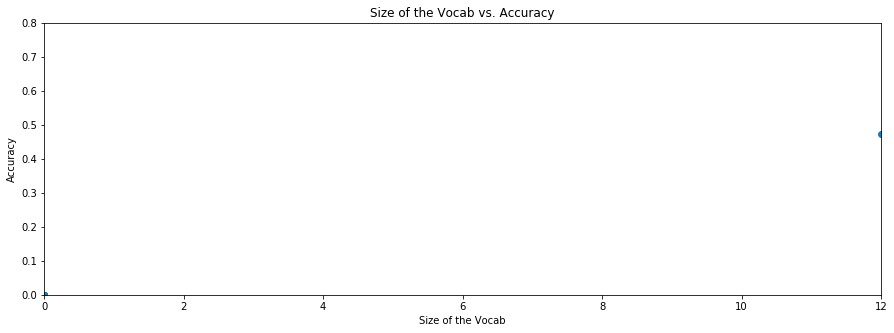

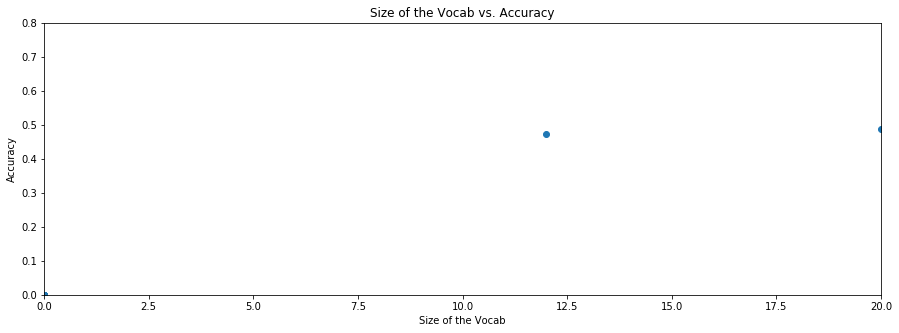

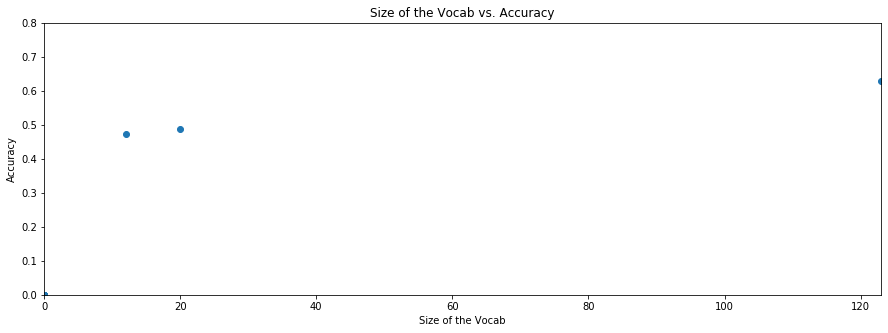

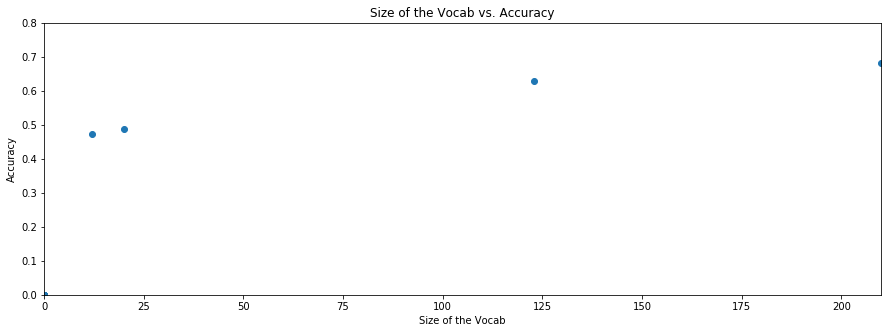

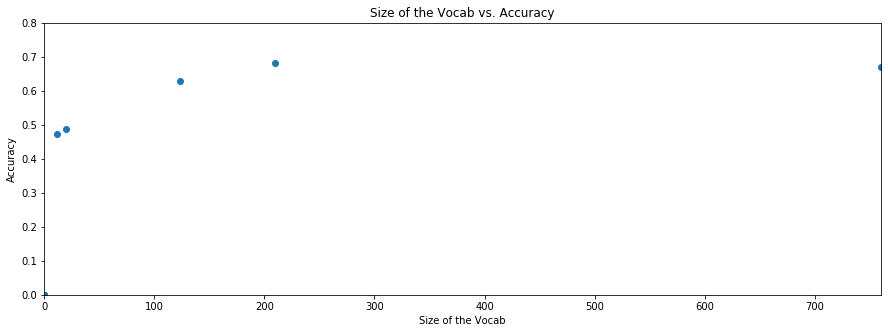

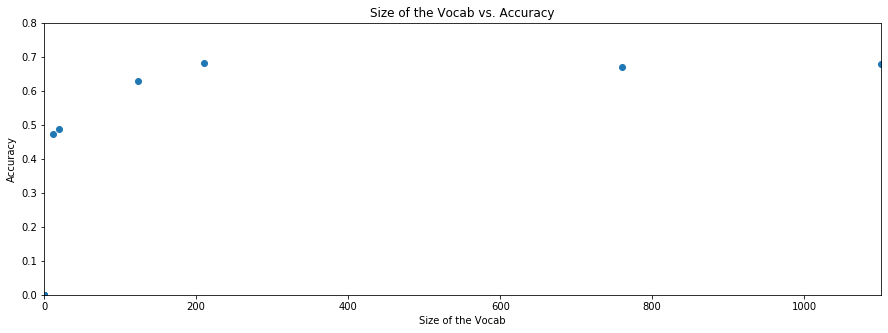

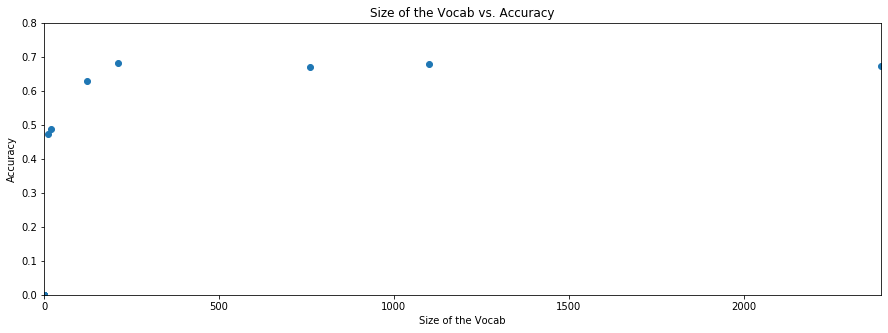

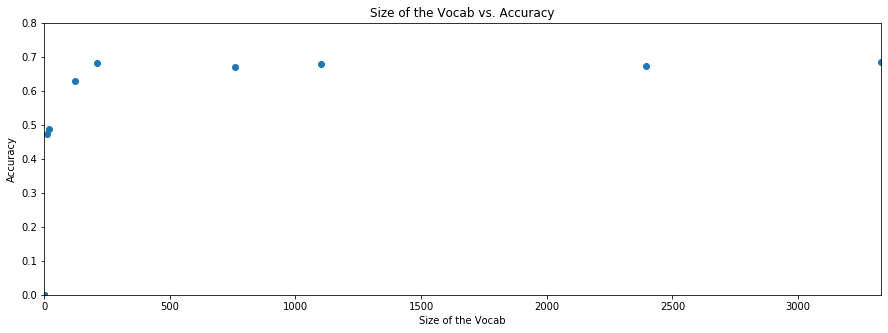

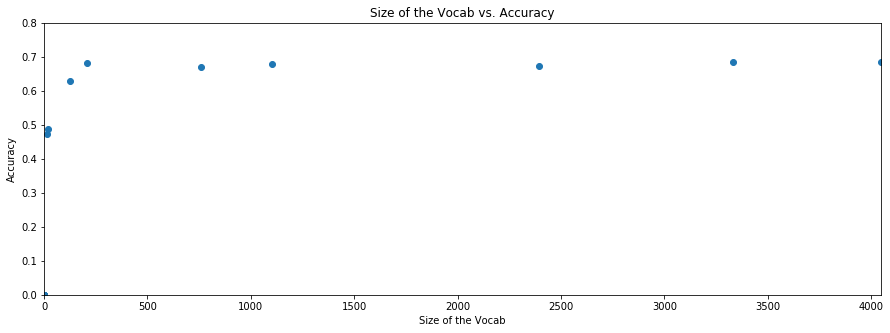

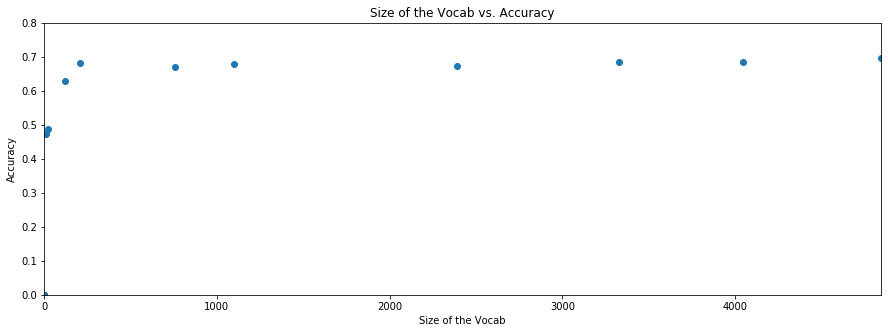

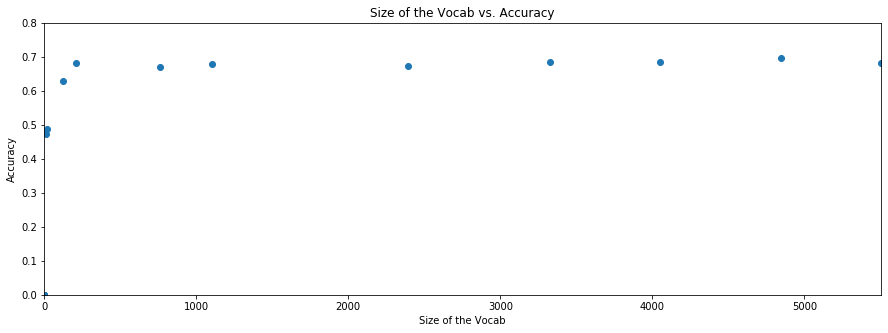

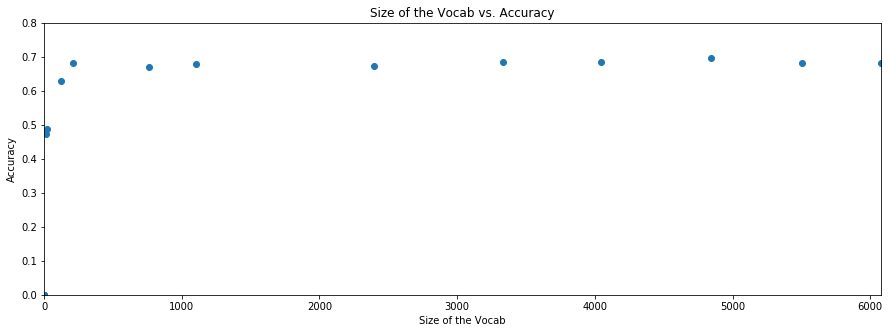

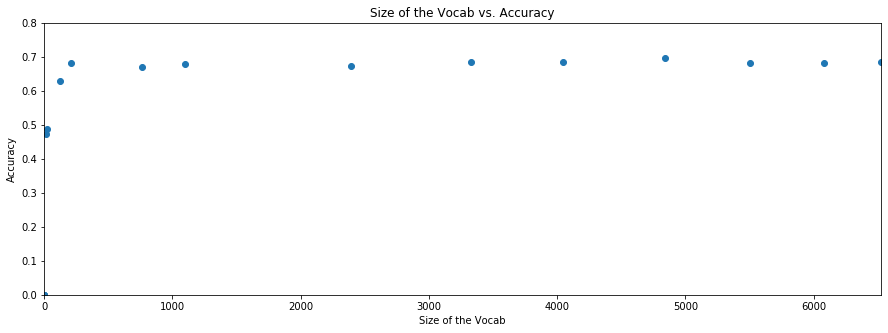

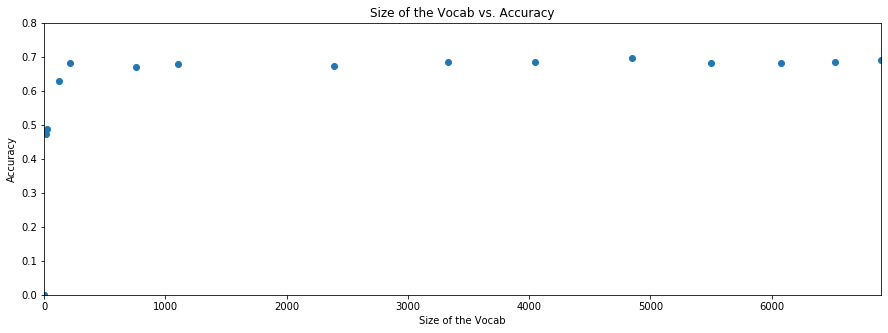

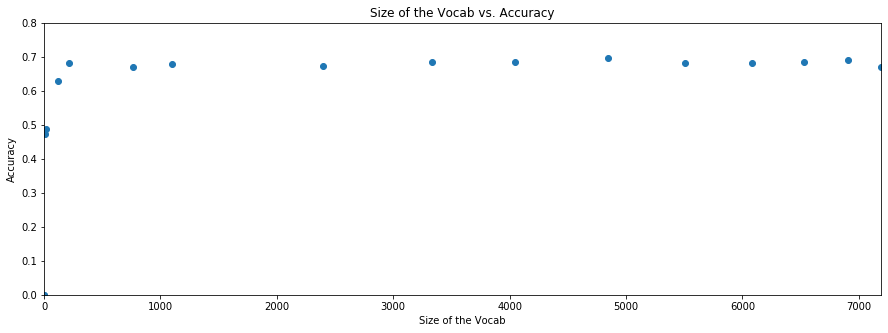

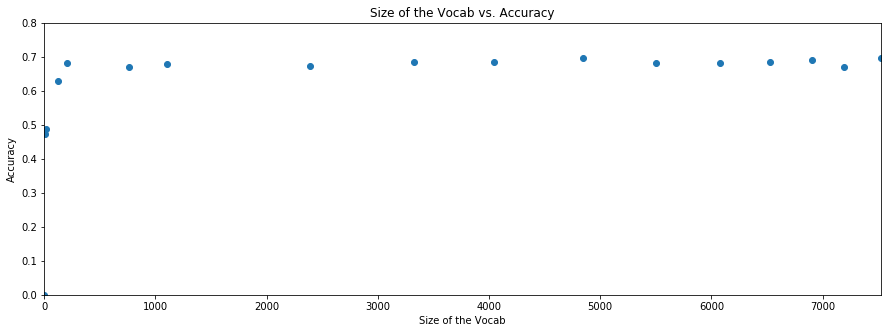

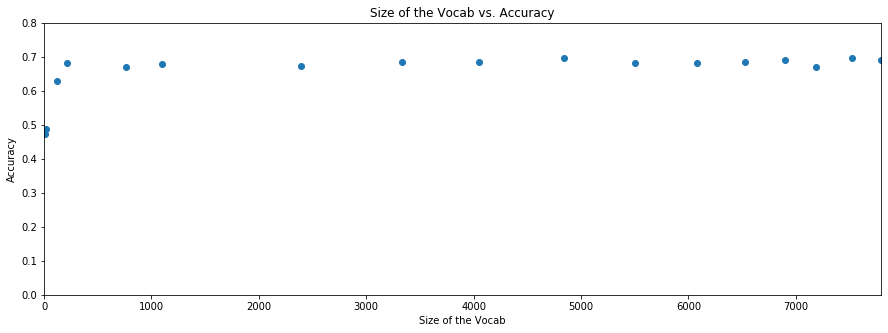

In [189]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    Val_C = np.concatenate([np.array([0.005,0.01,0.05,0.1,0.5,1,5]),np.linspace(10,100,10)])
    acc = np.zeros(len(Val_C))
    vocab_size = np.zeros(len(Val_C)).astype('u4')
    nonzero_weights = np.zeros(len(Val_C)).astype('u4')
    for i in range(len(Val_C)):
        vectorizer = CountVectorizer()
        vtrain = vectorizer.fit_transform(raw_documents=train_data)
        v_dev = vectorizer.transform(raw_documents = dev_data)
        Logit = LogisticRegression(penalty='l1',C = Val_C[i], tol=0.015)
        Logit.fit(vtrain,train_labels)
        
        vocab_size[i] = np.count_nonzero(np.apply_along_axis(np.count_nonzero,0,Logit.coef_))
        nonzero_weights[i] = np.apply_along_axis(np.count_nonzero, 0, Logit.coef_).sum()
        
        m = (Logit.coef_!=0)
        index = m.any(axis = 0)
        
        vtrain_pruned = vtrain[:,index]
        v_dev_pruned = v_dev[:,index]
        
        #logistic regression with l2
        
        Logit_l2 = LogisticRegression(penalty='l2',C = Val_C[i], tol = 0.015)
        Logit_l2.fit(vtrain_pruned,train_labels)
        dev_pruned = Logit_l2.predict(v_dev_pruned)
        acc[i] = metrics.accuracy_score(y_true = dev_labels, y_pred=dev_pruned)
        
        #result
        if Val_C[i] in [0.01,0.1,1,10,100]:
            Logit_l2.fit(vtrain,train_labels)
            l2_nonzero_weights = np.apply_along_axis(np.count_nonzero, 0, Logit_l2.coef_).sum()
            l2_vocab = np.count_nonzero(np.apply_along_axis(np.count_nonzero, 0, Logit_l2.coef_))
            
            format(Val_C[i])
            print ('Number of weights not equal to zero using l1 ',(nonzero_weights[i], round(100.*nonzero_weights[i]/l2_nonzero_weights)))
            dev_predicted_labels_unpruned = Logit_l2.predict(v_dev)
            accuracy_unpruned = metrics.accuracy_score(y_true = dev_labels, y_pred = dev_predicted_labels_unpruned)
            print ('accuracy using l2 penalty without pruning', format(accuracy_unpruned))
            print('accuracy using l2 pruning', (acc[i],round(100*(1-acc[i]/accuracy_unpruned),2)))
            
            
        # Plot the accuracy of the re-trained model vs. the vocabulary size when pruning unused
        # features by adjusting the C parameter.
        plt.figure(figsize=(15, 5))
        plt.scatter(vocab_size, acc)
        plt.xlabel("Size of the Vocab")
        plt.ylabel("Accuracy")
        plt.title('Size of the Vocab vs. Accuracy')
        plt.xlim([0, vocab_size.max()])
        plt.ylim([0, 0.8])
       
        
    
    
    ### STUDENT END ###
P6()

### Part 7:

Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [220]:
def P7():
### STUDENT START ###
    tfidf= TfidfVectorizer()
    vtrain = tfidf.fit_transform(raw_documents = train_data)
    Logit = LogisticRegression(penalty ='l2',C = 100)
    Logit.fit(vtrain,train_labels)
    v_dev = tfidf.transform(raw_documents=dev_data)
    dev_predicted = Logit.predict(v_dev)
    print ("accuracy:", format(100*metrics.accuracy_score(y_true=dev_labels,y_pred=dev_predicted)))
    dev_probs = Logit.predict_proba(v_dev)
    max_probs = dev_probs.max(axis=1)
    prob_correct_label = np.array([dev_probs[i,j] for i,j in zip(range(len(dev_labels)),dev_labels)])
    R = max_probs/prob_correct_label
    index = np.argpartition(R,-3)[-3:]
    index = index[np.argsort(R[index])][::-1]
    for i, ind in enumerate(index):
        print("-----------------------------------------------")
        print("(Document,R):", (ind+1,R[ind]))
        print("predicted category_prob,:",(max_probs[ind],newsgroups_train.target_names[dev_probs[ind,:].argmax()]))
        print(dev_data[ind])
        

## STUDENT END ###
P7()

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy: 76.33136094674556
-----------------------------------------------
(Document,R): (216, 929.3590022592057)
predicted category_prob,: (0.9937193482234278, 'comp.graphics')
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge

ANSWER: tfidfvectorizer is different from CV, tfidvectorizer puts less weight to words that appear in common documents. tfidfvectorizer generally gave higher accuracy predicting the category.

### mistake model is making?

model is making a mistake classifying certain categories, also when it comes to very short text, it has lots of noise. Atheism and religion has many common terms and tend to have missclassification. Come up with different ways to differentiate the category by giving more weights to specific term found in Atheism or religion.  